In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-extended/train.csv
/kaggle/input/titanic-extended/full.csv
/kaggle/input/titanic-extended/test.csv


In [4]:
titanic=pd.read_csv("/kaggle/input/titanic-extended/full.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [6]:
titanic.value_counts("Destination")
titanic.value_counts("Parch")
titanic.value_counts("SibSp")
titanic.value_counts("Lifeboat")

Lifeboat
13       42
C        41
15       38
14       34
4        31
5        29
10       29
11       26
9        26
3        26
8        24
16       23
7        22
6        21
12       18
D        18
2        14
?        12
A        11
B         9
1         5
14?       1
15?       1
A[64]     1
Name: count, dtype: int64

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


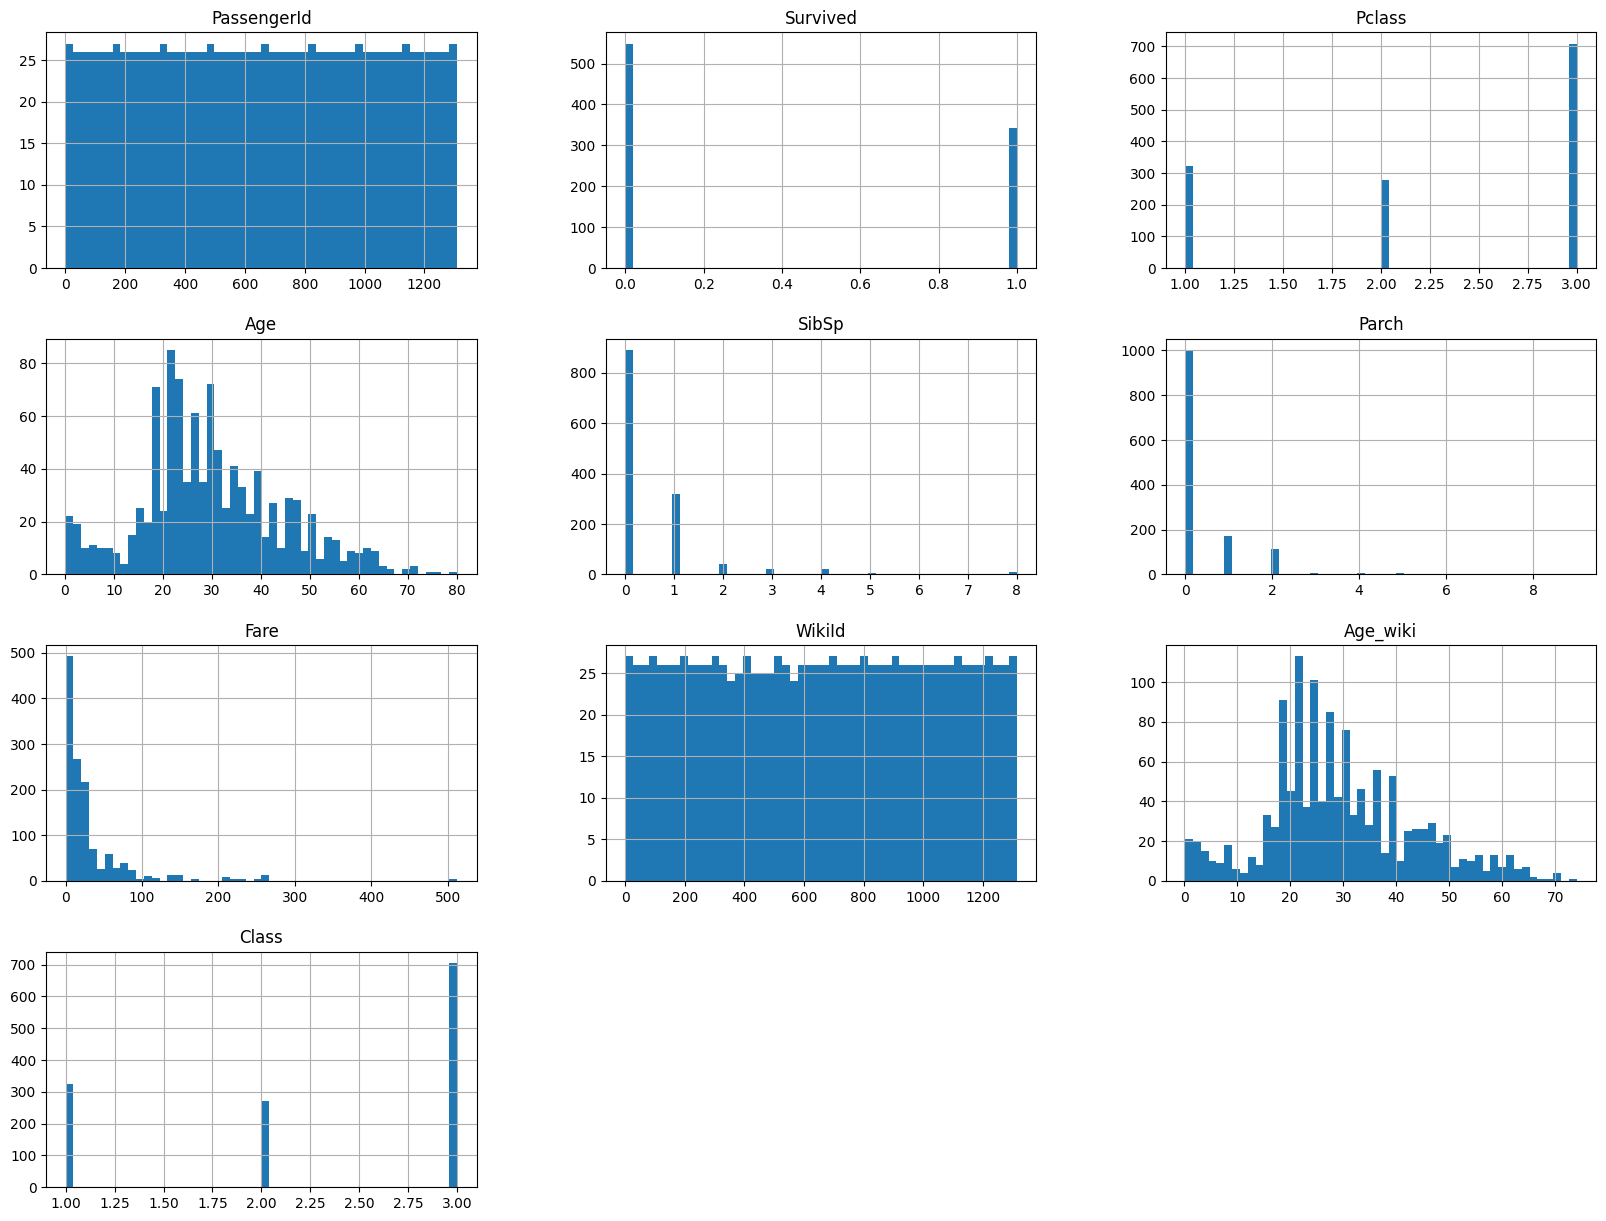

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
plt.show()

# If you were rich you were alive.

<Axes: xlabel='Pclass', ylabel='Count'>

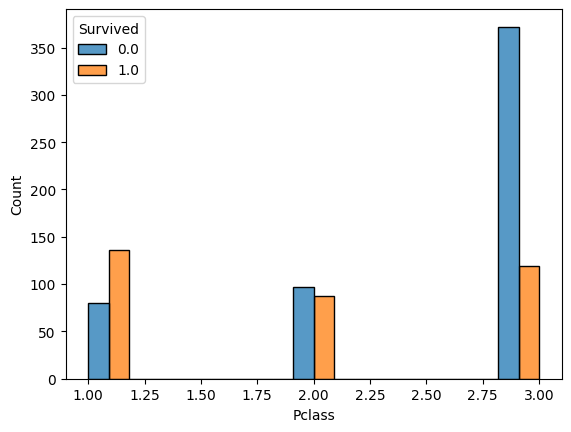

In [9]:
import seaborn as sns
sns.histplot(data=titanic, x='Pclass', hue='Survived', multiple='dodge')

# People back then were chivalrous for sure.

<Axes: xlabel='Sex', ylabel='Count'>

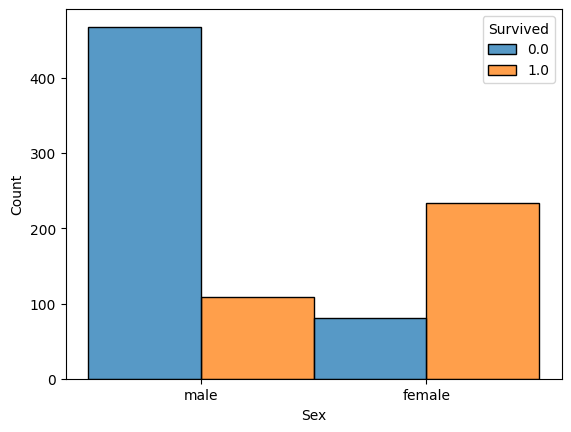

In [10]:
sns.histplot(data=titanic, x='Sex', hue='Survived', multiple='dodge')

<Axes: xlabel='Lifeboat', ylabel='Count'>

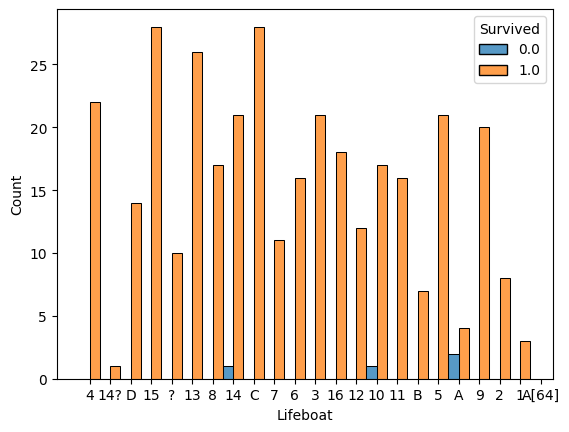

In [11]:
sns.histplot(data=titanic, x='Lifeboat', hue='Survived', multiple='dodge')

<Axes: xlabel='Hometown', ylabel='Count'>

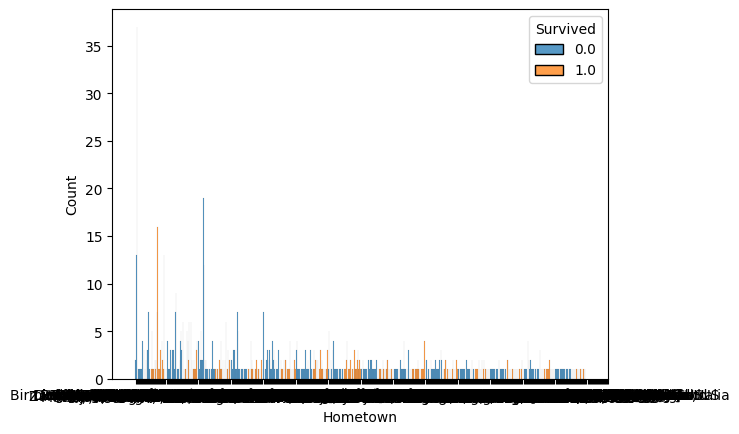

In [12]:
sns.histplot(data=titanic, x='Hometown', hue='Survived', multiple='dodge')

In [13]:
# titanic=titanic.drop(["Name", "Name_wiki", "WikiId", "Age_wiki"], axis=1)
titanic=titanic.drop(["Ticket"], axis=1)

In [14]:
print(titanic["Survived"].isna().sum())  # Counts NaNs in Survived
print(titanic.info())  # Shows all column NaNs


418
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  WikiId       1304 non-null   float64
 12  Name_wiki    1304 non-null   object 
 13  Age_wiki     1302 non-null   float64
 14  Hometown     1304 non-null   object 
 15  Boarded      1304 non-null   object 
 16  Destination  1304 non-null   object 
 17  Lifeboat     502 non-null    object 
 18  Body         130 non-null    object 
 19  Cl

In [15]:
# Train test split
from sklearn.model_selection import train_test_split
titanic = titanic.dropna(subset=["Survived"]) # dropping all the entries with Null values
y, X = titanic["Survived"], titanic.drop(["Survived"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Numeric pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# No need for ordinal encoding

# one-hot encoding
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, ['Pclass','Age','SibSp','Parch','Fare']),

    ('onehot', onehot_pipeline, ['Sex','Embarked'])
], remainder='drop')

In [17]:
titanic_prepared = preprocessor.fit_transform(X_train)
titanic_labels = y_train.copy()

# We need to check whether our passenger survived or not, which makes it a classification problem. Let's create the full pipeline and then check the scores using cross_val_score.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("forest_class", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

for metric in ["accuracy", "f1", "roc_auc"]:
    
    scores = cross_val_score(
        pipe,
        X_train,
        y_train,
        cv=5,
        scoring = metric
    )

    print(metric, scores.mean())

accuracy 0.7979020979020979
f1 0.7303261687404413
roc_auc 0.8535207086539376


# It is hyperparameter-tuning time!

In [19]:
# It's time to do some hyperparameter-tuning

from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    "forest_class__n_estimators": [200, 300, 500, 800],
    "forest_class__max_depth": [None, 5, 8, 12, 20],
    "forest_class__min_samples_split": [2, 5, 10, 20],
    "forest_class__min_samples_leaf": [1, 2, 5, 10],
    "forest_class__max_features": ["sqrt", "log2", 0.5],
    "forest_class__bootstrap": [True, False]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=40,
    scoring="roc_auc",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Pclass',
                                                                                'Age',
                                                                                'SibSp',
                                                                                'Parch',
                                                                                'Fare']),
                                                                              ('onehot',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unk...
                   n_iter=40, n_jobs=-1,
                   param_distributions={'forest_class__bootstrap': [True,
                                                                    False],
                                        'forest_class__max_depth': [None, 5, 8,
                                                                    12, 20],
                                        'forest_class__max_features': ['sqrt',
                                                                       'log2',
                                                                       0.5],
                                        'forest_class__min_samples_leaf': [1, 2,
                                                                           5,
                                                                           10],
                                        'forest_class__min_samples_split': [2,
                                                                            5,
                                                                            10,
                                                                            20],
                                        'forest_class__n_estimators': [200, 300,
                                                                       500,
                                                                       800]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [20]:
search.best_score_, search.best_params_

(np.float64(0.8772994178989476),
 {'forest_class__n_estimators': 300,
  'forest_class__min_samples_split': 2,
  'forest_class__min_samples_leaf': 5,
  'forest_class__max_features': 'log2',
  'forest_class__max_depth': 20,
  'forest_class__bootstrap': True})

In [21]:
best_model = search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('forest_class',
                 RandomForestClassifier(max_depth=20, max_features='log2',
                                        min_samples_leaf=5, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

# Now let's see how it performs on the test set because this decides if you would have survived on the Titanic or not.

In [22]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8044692737430168
F1: 0.72
ROC-AUC: 0.8376811594202899
